In [1]:
import pandas as pd

df = pd.read_csv("boston.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

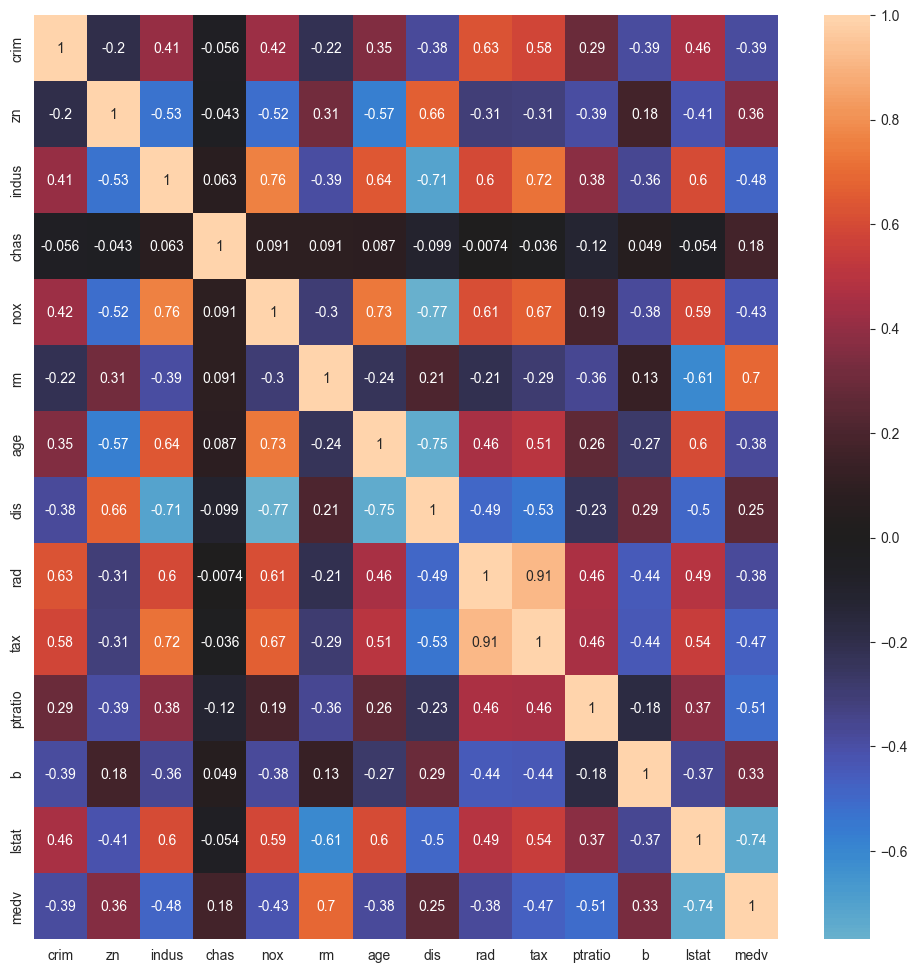

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, center=0.0, ax=ax)

## LSTAT only

In [4]:
import statsmodels.api as sm

X = df[['lstat']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        16:20:03   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
import statsmodels.api as sm

X = df[['rm']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        16:20:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
models = {
    "model1": ['lstat'],
    "model2": ['rm'],
    "model3": ['ptratio'],
    "model5": ['lstat', 'ptratio'],
    "model6": ['lstat', 'b'],
    "model7": ['lstat', 'b', 'ptratio'],
    "model4(cp)": ['lstat', 'rm'],
    "model8(cp)": ['lstat', 'rm', 'ptratio'],
}

# Iteracja przez modele i trenowanie
for name, predictors in models.items():
    X = df[predictors]
    X = sm.add_constant(X)  # dodanie biasu
    y = df['medv']

    model = sm.OLS(y, X).fit()
    r2 = model.rsquared
    print(f"\t{name}:\t\tR² = {r2:.4f}")

	model1:		R² = 0.5441
	model2:		R² = 0.4835
	model3:		R² = 0.2578
	model5:		R² = 0.6067
	model6:		R² = 0.5488
	model7:		R² = 0.6098
	model4(cp):		R² = 0.6386
	model8(cp):		R² = 0.6786


In [21]:
import statsmodels.api as sm

X = df[['ptratio']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.61e-34
Time:                        16:29:58   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.000      56.393      68.296
ptratio       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.api as sm

X = df[['lstat', 'ptratio']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model3 = sm.OLS(y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     387.9
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          1.22e-102
Time:                        16:30:56   Log-Likelihood:                -1604.2
No. Observations:                 506   AIC:                             3214.
Df Residuals:                     503   BIC:                             3227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0468      2.242     24.105      0.000      49.642      58.452
lstat         -0.8202      0.039    -21.120      0.000      -0.896      -0.744
ptratio       -1.1453      0.128     -8.941      0.000      -1.397      -0.894
==============================================================================
Omnibus:                      150.452   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.510
Skew:                           1.462   Prob(JB):                     2.39e-88
Kurtosis:                       6.253   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
import statsmodels.api as sm

X = df[['lstat', 'b']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model4 = sm.OLS(y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.19e-87
Time:                        16:31:00   Log-Likelihood:                -1638.9
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4859      1.460     21.562      0.000      28.617      34.355
lstat         -0.9155      0.041    -22.087      0.000      -0.997      -0.834
b              0.0074      0.003      2.275      0.023       0.001       0.014
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.896
Skew:                           1.496   Prob(JB):                     1.54e-69
Kurtosis:                       5.466   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import statsmodels.api as sm

X = df[['lstat', 'ptratio', 'b']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model6 = sm.OLS(y, X).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     261.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          3.52e-102
Time:                        16:31:04   Log-Likelihood:                -1602.1
No. Observations:                 506   AIC:                             3212.
Df Residuals:                     502   BIC:                             3229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2942      2.616     19.610      0.000      46.155      56.433
lstat         -0.7929      0.041    -19.344      0.000      -0.873      -0.712
ptratio       -1.1331      0.128     -8.863      0.000      -1.384      -0.882
b              0.0061      0.003      2.026      0.043       0.000       0.012
==============================================================================
Omnibus:                      157.529   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.173
Skew:                           1.516   Prob(JB):                     4.31e-96
Kurtosis:                       6.411   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

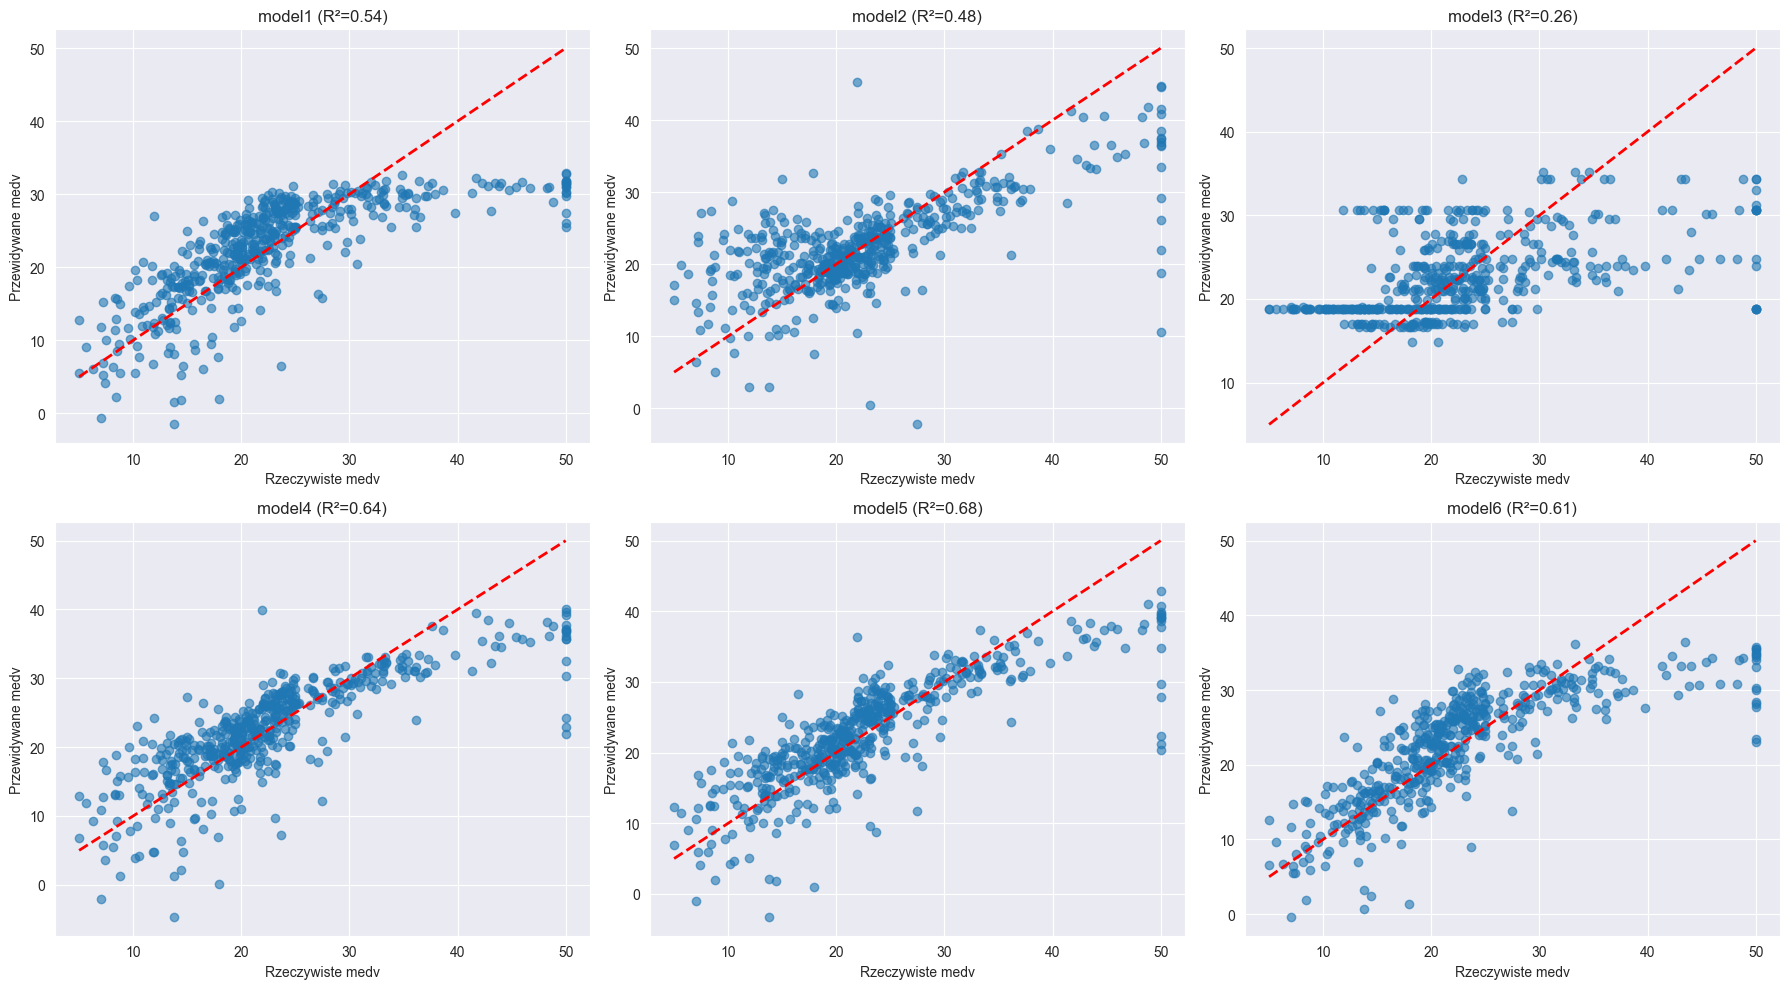

In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Definiujemy modele
model_map = {
    "model1": ['lstat'],
    "model2": ['rm'],
    "model3": ['ptratio'],
    "model4": ['lstat', 'rm'],
    "model5": ['lstat', 'rm', 'ptratio'],
    "model6": ['lstat', 'ptratio', 'b'],
}

# Rzeczywiste wartości
y_true = df['medv']

# Stworzymy subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Iterujemy po modelach
for idx, (name, predictors) in enumerate(model_map.items()):
    X = sm.add_constant(df[predictors])
    model = sm.OLS(y_true, X).fit()
    y_pred = model.predict(X)

    # Wykres: przewidywane vs rzeczywiste
    ax = axes[idx]
    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    ax.set_title(f"{name} (R²={model.rsquared:.2f})")
    ax.set_xlabel("Rzeczywiste medv")
    ax.set_ylabel("Przewidywane medv")

plt.tight_layout()
plt.show()


In [28]:
import statsmodels.formula.api as smf

X = df[['lstat', 'ptratio', 'b']]
X = sm.add_constant(X)  # Dodanie wyrazu wolnego
y = df['medv']

model7 = smf.ols(formula="medv ~ lstat + ptratio + b", data=df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     261.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          3.52e-102
Time:                        16:41:04   Log-Likelihood:                -1602.1
No. Observations:                 506   AIC:                             3212.
Df Residuals:                     502   BIC:                             3229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.2942      2.616     19.610      0.000      46.155      56.433
lstat         -0.7929      0.041    -19.344      0.000      -0.873      -0.712
ptratio       -1.1331      0.128     -8.863      0.000      -1.384      -0.882
b              0.0061      0.003      2.026      0.043       0.000       0.012
==============================================================================
Omnibus:                      157.529   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.173
Skew:                           1.516   Prob(JB):                     4.31e-96
Kurtosis:                       6.411   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

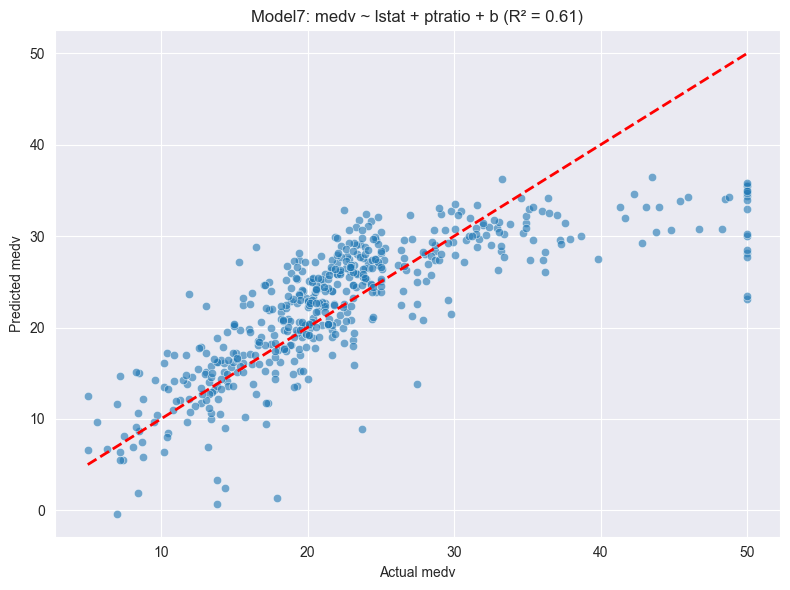

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict values using model7
y_true = df['medv']
y_pred = model7.predict(df)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.title(f"Model7: medv ~ lstat + ptratio + b (R² = {model7.rsquared:.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()
